# Problem Statement

![](https://storage.googleapis.com/kaggle-datasets-images/792/1472/8853c0b4591bba14e29305fcaa29f2f9/dataset-cover.jpg)

Project ini bertujuan untuk merancang model klasifikasi terbaik dalam menyelesaikan masalah binary classification menggunakan beberaoa model machine learning tradisional. Data yang digunakan dalam project ini merupakan salah satu real-world dataset yang diperoleh melalui [Medical Appointment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments).

- Latar Belakang.<br>
Tingkat ketidakhadiran pasien di klinik menyebabkan dampak negatif—ruang yang terbuang, penjadwalan jadi tidak efisien, dan kualitas layanan kesehatan menurun. Dengan data historis dari klinik di Brasil, kita ingin memodelkan risiko “no‑show” untuk meningkatkan perencanaan operasional provider kesehatan

- Problem utama.<br>
Klasifikasi biner: "Apakah pasien akan datang (show) atau tidak (no-show)" berdasarkan fitur seperti usia, jenis kelamin, lokasi, faktor kesehatan kronis , apakah menerima pengingat SMS, dan lainnya.

- Tujuan Analisis.<br>
  1. Membangun model ML tradisional (misalnya: Logistic Regression, Random Forest, XGBoost) untuk memprediksi no‑show.
  2. Menggali insight: faktor paling berpengaruh (misalnya age, SMS, scholarship, hypertension, dsb).
  3. Menggunakan LLM untuk menjelaskan hasil dan merumuskan rekomendasi konkrit bagi klinik.

## Library

In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.8 MB/s eta 0:00:00


In [2]:
import os
from google.colab import userdata

api_token=userdata.get('api_token')
os.environ['REPLICATE_API_TOKEN']=api_token

In [3]:
from langchain_community.llms import Replicate
# semaki tinggi temperature semakin tinggi kreatifitas/keacakan jawabannya, semakin rendah temperature
# semakin rendan keacakan jawabannya, bahkan kalau 0 maka jawabannya akan konsisten
parameters={
    'top_k':5,
    'top_p':1.0,
    'max_tokens': 4096,
    'random_seed':None,
    'repetition_penalty':1.0,
    'temperature':0.7,
    'stopping_criteria': 'length'
}

llm=Replicate(
    model='ibm-granite/granite-3.3-8b-instruct',
    input=parameters,
)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

## LLM Model

In [5]:
from langchain_community.llms import Replicate
# semaki tinggi temperature semakin tinggi kreatifitas/keacakan jawabannya, semakin rendah temperature
# semakin rendan keacakan jawabannya, bahkan kalau 0 maka jawabannya akan konsisten
parameters={
    'top_k':5,
    'top_p':1.0,
    'max_tokens': 4096,
    'random_seed':None,
    'repetition_penalty':1.0,
    'temperature':0.7,
    'stopping_criteria': 'length'
}

llm=Replicate(
    model='ibm-granite/granite-3.3-8b-instruct',
    input=parameters,
)

## Load the Data

In [6]:
raw_data= pd.read_csv('KaggleV2-May-2016.csv')

In [7]:
raw_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Preprocessing and Feature Engineering

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Berdasarkan informasi diatas, kita memiliki kolom yang berkaitan dengan date. Oleh karenanya, extract informasi waktu pada kolom tersebut.

In [9]:
Date_Column = ['ScheduledDay', 'AppointmentDay']

def split_date(df, time_column):
    df[time_column] = pd.to_datetime(df[time_column])
    df[time_column + '_Year'] = df[time_column].dt.year
    df[time_column + '_Month'] = df[time_column].dt.month
    df[time_column + '_Day'] = df[time_column].dt.day
    df[time_column + '_Hour'] = df[time_column].dt.hour
    df[time_column + '_Weekday'] = df[time_column].dt.weekday  # Senin = 0, Minggu = 6
    df[time_column + '_Weekname'] = df[time_column].dt.day_name()

    return df

In [10]:
# Loop untuk setiap kolom waktu
for col in Date_Column:
    raw_data = split_date(raw_data, col)

raw_data['DateDiff'] = (raw_data['AppointmentDay'] - raw_data['ScheduledDay']).dt.days
raw_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,ScheduledDay_Hour,ScheduledDay_Weekday,ScheduledDay_Weekname,AppointmentDay_Year,AppointmentDay_Month,AppointmentDay_Day,AppointmentDay_Hour,AppointmentDay_Weekday,AppointmentDay_Weekname,DateDiff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,18,4,Friday,2016,4,29,0,4,Friday,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,16,4,Friday,2016,4,29,0,4,Friday,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,16,4,Friday,2016,4,29,0,4,Friday,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,17,4,Friday,2016,4,29,0,4,Friday,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,16,4,Friday,2016,4,29,0,4,Friday,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,...,9,1,Tuesday,2016,6,7,0,1,Tuesday,34
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,...,7,1,Tuesday,2016,6,7,0,1,Tuesday,34
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,...,16,2,Wednesday,2016,6,7,0,1,Tuesday,40
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,...,15,2,Wednesday,2016,6,7,0,1,Tuesday,40


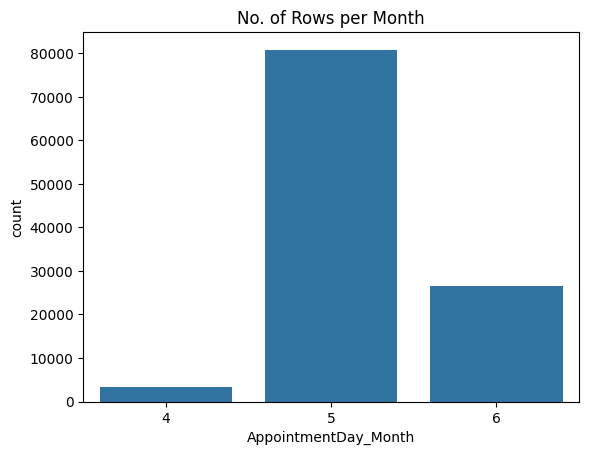

In [11]:
plt.title('No. of Rows per Month')
sns.countplot(x=raw_data['AppointmentDay_Month']);

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   PatientId                110527 non-null  float64            
 1   AppointmentID            110527 non-null  int64              
 2   Gender                   110527 non-null  object             
 3   ScheduledDay             110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay           110527 non-null  datetime64[ns, UTC]
 5   Age                      110527 non-null  int64              
 6   Neighbourhood            110527 non-null  object             
 7   Scholarship              110527 non-null  int64              
 8   Hipertension             110527 non-null  int64              
 9   Diabetes                 110527 non-null  int64              
 10  Alcoholism               110527 non-null  int64              
 11  Handcap      

In [13]:
raw_data.select_dtypes(include=['object'])

,Gender,Neighbourhood,No-show,ScheduledDay_Weekname,AppointmentDay_Weekname
0,F,JARDIM DA PENHA,No,Friday,Friday
1,M,JARDIM DA PENHA,No,Friday,Friday
2,F,MATA DA PRAIA,No,Friday,Friday
3,F,PONTAL DE CAMBURI,No,Friday,Friday
4,F,JARDIM DA PENHA,No,Friday,Friday
...,...,...,...,...,...
110522,F,MARIA ORTIZ,No,Tuesday,Tuesday
110523,F,MARIA ORTIZ,No,Tuesday,Tuesday
110524,F,MARIA ORTIZ,No,Wednesday,Tuesday
110525,F,MARIA ORTIZ,No,Wednesday,Tuesday


### Input and Target Column

In [14]:
list(raw_data.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'ScheduledDay_Year',
 'ScheduledDay_Month',
 'ScheduledDay_Day',
 'ScheduledDay_Hour',
 'ScheduledDay_Weekday',
 'ScheduledDay_Weekname',
 'AppointmentDay_Year',
 'AppointmentDay_Month',
 'AppointmentDay_Day',
 'AppointmentDay_Hour',
 'AppointmentDay_Weekday',
 'AppointmentDay_Weekname',
 'DateDiff']

In [15]:
input_cols=[
 'Gender',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'ScheduledDay_Year',
 'ScheduledDay_Month',
 'ScheduledDay_Day',
 'ScheduledDay_Hour',
 'ScheduledDay_Weekday',
 'AppointmentDay_Year',
 'AppointmentDay_Month',
 'AppointmentDay_Day',
 'AppointmentDay_Weekday',
 'DateDiff']
target_cols=['No-show']

In [16]:
inputs=raw_data[input_cols].copy()
targets=raw_data[target_cols].copy()
targets['No-show'] = targets['No-show'].map({'No': 0, 'Yes': 1})

### Splitting Data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [19]:
inputs.isna().sum()

,0
Gender,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0
Alcoholism,0
Handcap,0
SMS_received,0
ScheduledDay_Year,0


### Encode Categorical Value

In [20]:
raw_data['Neighbourhood'].value_counts()

,count
Neighbourhood,
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514
...,...
ILHA DO BOI,35
ILHA DO FRADE,10
AEROPORTO,8


In [21]:
#Encode X_train column
count_map = X_train['Neighbourhood'].value_counts()
X_train['Neighbourhood'] = X_train['Neighbourhood'].map(count_map)
X_train['Gender'] = X_train['Gender'].map({'F': 0, 'M': 1})

#Encode X_test column
count_map = X_test['Neighbourhood'].value_counts()
X_test['Neighbourhood'] = X_test['Neighbourhood'].map(count_map)
X_test['Gender'] = X_test['Gender'].map({'F': 0, 'M': 1})

In [22]:
X_train

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_Year,ScheduledDay_Month,ScheduledDay_Day,ScheduledDay_Hour,ScheduledDay_Weekday,AppointmentDay_Year,AppointmentDay_Month,AppointmentDay_Day,AppointmentDay_Weekday,DateDiff
58187,0,25,508,0,0,0,0,0,0,2016,5,11,16,2,2016,5,19,3,7
5095,1,62,206,0,0,0,0,0,0,2016,5,13,8,4,2016,5,17,1,3
67919,0,65,6208,0,0,0,0,0,0,2016,3,22,11,1,2016,5,9,0,47
2861,1,41,4603,0,0,0,0,0,0,2016,4,29,8,4,2016,4,29,4,-1
45949,1,61,1532,0,1,0,1,0,0,2016,5,6,18,4,2016,5,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,0,63,1999,0,1,1,0,0,1,2016,5,5,12,3,2016,5,10,1,4
110268,1,31,4603,0,0,0,0,0,0,2016,4,26,13,1,2016,6,1,2,35
103694,0,38,1789,0,0,0,0,0,0,2016,6,2,8,3,2016,6,8,2,5
860,0,18,1532,1,0,0,0,0,0,2016,4,29,9,4,2016,4,29,4,-1


## Training

In [23]:
from xgboost import XGBClassifier

In [24]:
model=XGBClassifier(random_state=42, n_jobs=-1, n_estimators=50, max_depth=5).fit(X_train,y_train)

In [25]:
preds=model.predict(X_train)

In [26]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [28]:
importance_df

,feature,importance
18,DateDiff,0.445377
8,SMS_received,0.079769
1,Age,0.060277
6,Alcoholism,0.045979
3,Scholarship,0.040049
10,ScheduledDay_Month,0.039277
0,Gender,0.036730
7,Handcap,0.030292
13,ScheduledDay_Weekday,0.029449
12,ScheduledDay_Hour,0.027090


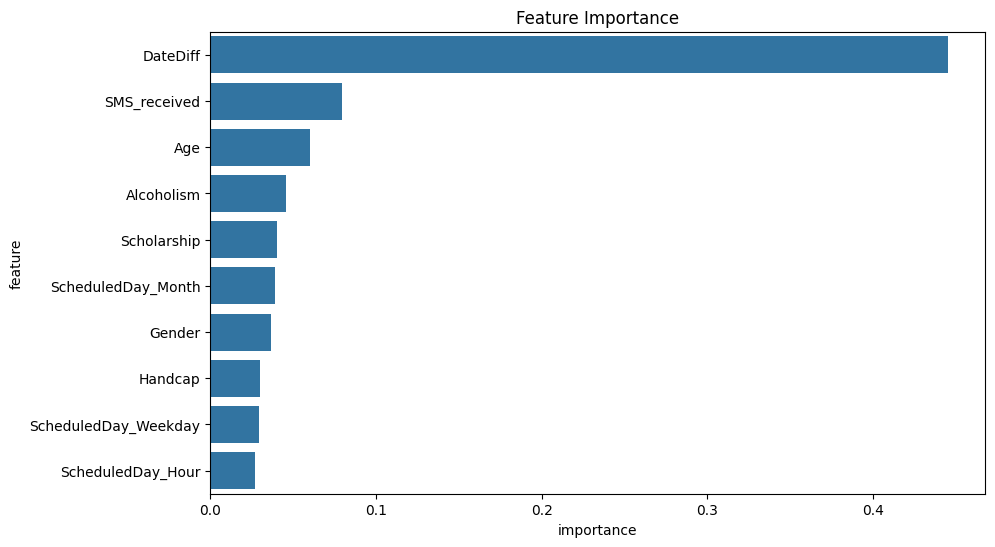

In [29]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [33]:
prompt= f"""
Analyze the feature importance results in {importance_df} dataframe. Why each feature has a higher/lower importance level than the others.
"""

output = llm.invoke(prompt)
print(f"AI OUTPUT RECOMENDATIONS: {output}")

AI OUTPUT RECOMENDATIONS: The given table presents the feature importance results from a machine learning model, likely a decision tree-based model (like Random Forest or XGBoost), which assigns scores to different features based on their predictive power. The scores are relative and do not represent absolute values but indicate how useful or important each feature is in making predictions.

Here's an analysis based on the provided data:

1. **DateDiff (Importance: 0.445377):** This feature is the most important, with a relatively high score. It suggests that the time difference between the current date and some relevant event date (like an appointment or a scheduled day) plays a crucial role in predicting the target variable. The larger the difference, the more impact it has, which could imply temporal trends or patterns over time in the dataset.

2. **SMS_received (Importance: 0.079769):** This feature has considerable importance, indicating that the reception of Short Message Servic

In [38]:
prompt= f"""
I used XGBClassifier to classify whether the patient will show or not (no-show)
based on features such as age, gender, location, chronic health factors, whether to receive SMS reminders, etc.
as in the {raw_data} dataframe. Then i split the data into {X_train}, {y_train}, {X_test}, {y_test}.
Help me improve the performance of the base model by performing hyperparameter tuning for the model: {model} using bayesian optimization like optuna, make simple optimizer, dont to much params .
"""
output1 = llm.invoke(prompt)
print(output1)

To improve the performance of your XGBClassifier model using Bayesian Optimization with Optuna, we'll follow these steps:

1. Import required libraries
2. Define the objective function to minimize (negative AUC score in your case)
3. Set up the study with Optuna
4. Perform optimization and get the best parameters
5. Train the XGBClassifier model using the best parameters

Here's the code to achieve this:

```python
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load your dataset and preprocess it if necessary
X = ...  # Your features
y = ...  # Your target variable (no-show: 1, show: 0)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameter space for optimization
    params = {
        "n_estimators": trial.suggest

In [40]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 25.7 MB/s eta 0:00:00


In [41]:
import xgboost as xgb
import optuna
from sklearn.metrics import roc_auc_score

In [42]:
# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameter space for optimization
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 20, 200),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 1, 10),
        "gamma": trial.suggest_uniform("gamma", 0, 5),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1),
    }

    # Create XGBoost model with the given hyperparameters
    model = xgb.XGBClassifier(
        base_score=None,
        booster=None,
        objective="binary:logistic",
        **params
    )

    # Train the model
    model.fit(X_train, y_train)

    # Get predictions on the validation set
    y_pred = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred > 0.5).astype(int)  # Convert to binary predictions

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred)

    # Optuna wants to minimize the objective, so we return the negative AUC
    return -auc_score

In [43]:
# Set up the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

[I 2025-08-01 15:56:53,149] A new study created in memory with name: no-name-0ebfea25-cb12-42f0-8c9f-25369e134349
[I 2025-08-01 15:56:54,057] Trial 0 finished with value: -0.5 and parameters: {'n_estimators': 150, 'learning_rate': 0.011324850714296708, 'max_depth': 3, 'min_child_weight': 7.0133348747983115, 'gamma': 1.4663551614075465, 'subsample': 0.9087573300960043, 'colsample_bytree': 0.5642637659794455}. Best is trial 0 with value: -0.5.
[I 2025-08-01 15:56:54,904] Trial 1 finished with value: -0.5016878120872269 and parameters: {'n_estimators': 106, 'learning_rate': 0.06135196258427089, 'max_depth': 6, 'min_child_weight': 1.302861537045943, 'gamma': 3.737004534071044, 'subsample': 0.6287951228314328, 'colsample_bytree': 0.7679715438346106}. Best is trial 1 with value: -0.5016878120872269.
[I 2025-08-01 15:56:56,462] Trial 2 finished with value: -0.501434640274143 and parameters: {'n_estimators': 139, 'learning_rate': 0.02687779884801452, 'max_depth': 8, 'min_child_weight': 8.18072

In [44]:
# Get the best parameters
best_params = study.best_params

In [45]:
# Train the XGBClassifier using the best parameters
best_model = xgb.XGBClassifier(
    objective="binary:logistic",
    **best_params,
)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7004580875460626, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.6891866749341169, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2769836890113705,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2.177048854509517, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=184,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
A=f'Train Score : {best_model.score(X_train, y_train)} || Test Score : {best_model.score(X_test, y_test)}'
print(A)

Train Score : 0.9234118591737257 || Test Score : 0.772957568081064


In [53]:
prompt= f"""
Based on the best_model.score on {A}, we know that the {best_model} is overfitting, how we can fix it?. Give me the code to fix it.
"""
output2 = llm.invoke(prompt)
print(output2)

Overfitting occurs when a model performs well on the training data but poorly on unseen data (test data). This is often due to the model learning the noise in the training data instead of the underlying pattern. To address overfitting in your XGBoost model, consider the following strategies:

1. **Reduce model complexity**: This can be done by reducing the depth of the trees, the number of estimators, learning rate, or other hyperparameters that influence model complexity.

2. **Regularization**: Increase the `reg_lambda` (L2 regularization term) and/or `reg_alpha` (L1 regularization term) parameters, which penalize complex models.

3. **Feature selection**: Use feature importance provided by XGBoost to select only the most relevant features, reducing model complexity.

4. **Early stopping**: Implement early stopping during training to halt when the performance on a validation set stops improving.

Here's a revised version of your XGBClassifier with some modifications to address overfi

In [59]:
from sklearn.metrics import accuracy_score

# Create DMatrix for training and testing
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters
params = {
    'objective': 'binary:logistic',  # Ini penting untuk klasifikasi!
    'learning_rate': 0.1,
    'max_depth': 5,
    'reg_lambda': 10.0,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}
num_round = 100

In [60]:
# Train model
model = xgb.train(params, dtrain, num_boost_round=num_round,
                  evals=[(dtest, 'test')], early_stopping_rounds=10)

[0]	test-logloss:0.49310
[1]	test-logloss:0.48591
[2]	test-logloss:0.48094
[3]	test-logloss:0.47662
[4]	test-logloss:0.47152
[5]	test-logloss:0.46893
[6]	test-logloss:0.46549
[7]	test-logloss:0.46340
[8]	test-logloss:0.46037
[9]	test-logloss:0.45778
[10]	test-logloss:0.45587
[11]	test-logloss:0.45405
[12]	test-logloss:0.45260
[13]	test-logloss:0.45125
[14]	test-logloss:0.44998
[15]	test-logloss:0.44893
[16]	test-logloss:0.44817
[17]	test-logloss:0.44788
[18]	test-logloss:0.44720
[19]	test-logloss:0.44650
[20]	test-logloss:0.44600
[21]	test-logloss:0.44548
[22]	test-logloss:0.44503
[23]	test-logloss:0.44474
[24]	test-logloss:0.44440
[25]	test-logloss:0.44404
[26]	test-logloss:0.44394
[27]	test-logloss:0.44373
[28]	test-logloss:0.44353
[29]	test-logloss:0.44332
[30]	test-logloss:0.44313
[31]	test-logloss:0.44292
[32]	test-logloss:0.44286
[33]	test-logloss:0.44277
[34]	test-logloss:0.44257
[35]	test-logloss:0.44236
[36]	test-logloss:0.44220
[37]	test-logloss:0.44212
[38]	test-logloss:0.44

In [61]:
# Predict on test data
y_pred = model.predict(dtest)
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]

In [62]:
# Evaluate accuracy
test_score = accuracy_score(y_test, y_pred_class)

In [63]:
# Predict on train for train accuracy (optional)
y_pred_train = model.predict(dtrain)
y_pred_train_class = [1 if p >= 0.5 else 0 for p in y_pred_train]
train_score = accuracy_score(y_train, y_pred_train_class)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

Train Accuracy: 0.7998
Test Accuracy: 0.7992


In [64]:
prompt= f"""
Get insight from the result {y_pred} and {y_pred_train}, then the score of {test_score} and {train_score}, make one example predictions, and explain results and formulate concrete recommendations for the clinic.
"""
output3 = llm.invoke(prompt)
print(output3)

Based on the provided results and scores, it appears we are dealing with two sets of predictions, each likely representing different aspects of a clinical assessment or diagnostic test. Here's a breakdown:

Results:
- First set: [0.04788331, 0.39895695, 0.30972433, ..., 0.41947934, 0.20748602, 0.04207673]
- Second set: [0.30404663, 0.16570994, 0.2970005, ..., 0.21733136, 0.06078613, 0.25738668]

Scores:
- First score: 0.799194788745137
- Second score: 0.7998213094174461

Insight and Explanation:

1. **Prediction Interpretation**: The first result set seems to indicate probabilities or scores for different categories or features, possibly related to the presence/absence of certain conditions or traits. The values range between approximately 0 and 0.42, suggesting these are either normalized probabilities or similar metrics where 0 represents no presence and 1 would indicate full presence.

2. **Second Set Interpretation**: The second result set also appears to represent probabilities, b